# Задание 1.2, Панченко С., 674

Загрузим необходимые модули.

In [23]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

Загрузим искомый датасет и заведем набор вспомогательных переменных.

In [4]:
X,y = load_iris(return_X_y = True)

In [7]:
classes = np.unique(y)
print("Class labels: {}".format(classes))
N = classes.shape[0]
M = X.shape[1]

Class labels: [0 1 2]


Сформируем матрицу средних значений каждого признака внутри каждого из классов

In [12]:
means = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        means[i , j] = X[y == i, j].mean()

Наконец, сформируем таблицу разностей средних значений признаков между различными классами (в таблице признаки пронумерованы от 0 до 3 по вертикали).

In [13]:
mean_differencies = {}
for i in range(N):
    for j in range(N):
        if j > i:
            key = 'mean diff:' + str(j) + '-' + str(i)
            mean_differencies[key] = means[j] - means[i]

In [14]:
pd.DataFrame(mean_differencies)

,mean diff:1-0,mean diff:2-0,mean diff:2-1
0,0.930,1.582,0.652
1,-0.658,-0.454,0.204
2,2.798,4.090,1.292
3,1.080,1.780,0.700


В качестве размера эффекта выберем корреляцию Пирсона между каждым из признаков и результирующей меткой класса.

In [21]:
correlations = []
for i in range(M):
    correlations.append(pearsonr(X[:, i], y)[0])
    
corr_dict = dict(correlations = correlations)
pd.DataFrame(corr_dict)

,correlations
0,0.782561
1,-0.426658
2,0.949035
3,0.956547


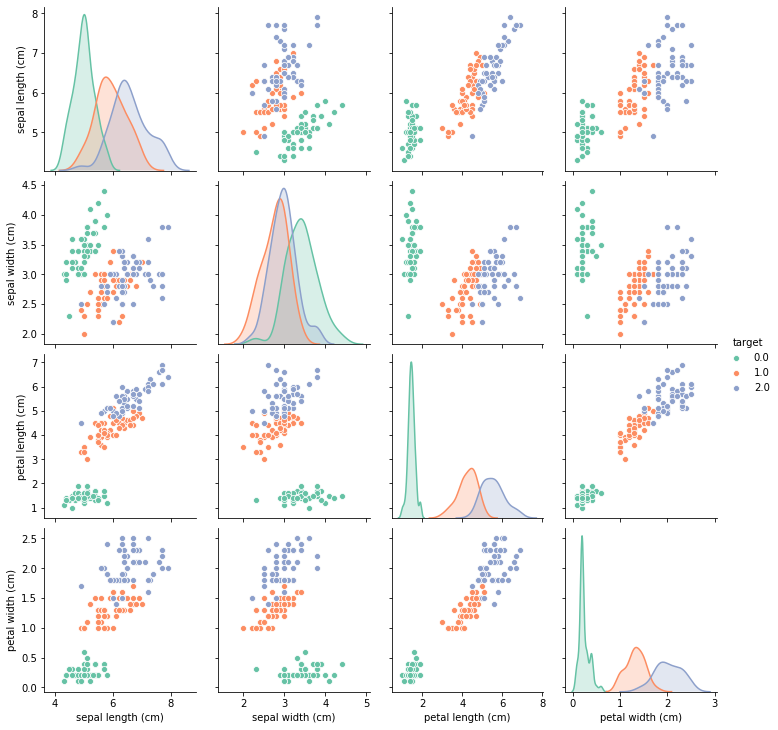

In [26]:
raw_data = load_iris()
feature_names = raw_data.feature_names
df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns = feature_names + ['target'])
sns_plot = sns.pairplot(df, hue='target', palette="Set2", diag_kind="kde")

Полученные высокие значения коэффициента корреляции для 3-его и 4-ого признаков свидетельствуют о наличии выраженной линейной связи между ними и целевой переменной (что подтверждается приведённой иллюстрацией).